# Démonstration 1  

* Mercredi le 11 Septembre 2024
* 9h30-11h30, SH-3620 | Campus de Montréal
* Présenté par Amanda Boatswain Jacques

## **Exercice 1**

On considère le problème consistant à additionner deux nombres naturels exprimés dans la base deux, dont les "chiffres" sont stockés dans des tableaux de $n$ éléments. Ces tableaux sont respectivement appelés $A$ et $B$. La somme des deux nombres doit être calculée et placée dans un tableau nommé $C$ et contenant $ n+1 $ éléments.

(a) Écrivez une fonction qui prend en entrée les tableaux $A$ et $B$ et retourne le tableau $C$. (b) Quelle est la complexité de votre algorithme?


*Solution*:


*a.   Écrivez une fonction qui prend en entrée les tableaux $A$ et $B$ et retourne le tableau $C$.*

On suppose que le chiffre le moins significatif se trouve à l'indice
n, et le chiffre le plus significatif à l'indice 0.  L'algorithme parcourt alors les tableaux $A$ et $B$ de droite à gauche (de l'indice $n$ à $0$).

On peut visualiser un exemple en utilisant 2 tableaux A et B où $n = 3 $  bits. On se sert d'une variable nommée `retenue`, qui va gérer le report de l'addition lorsque la somme d'une colonne dépasse une valeur de 1. L'opération d'addition génère un tableau de longueur au plus égal à n + 1 (dans ce cas, 3 + 1 = 4).

&nbsp;  
<img src="https://raw.githubusercontent.com/AmandaBoatswain/INF5130/8b944a86894b1781475678968e7c783b602d5bf3/figures/exercice_1fig1.png" />


Pseudocode pour la fonction *addition_binaire*

```
Fonction addition_binaire(A, B):
    Entrée :
        A : tableau de n éléments (bits)
        B : tableau de n éléments (bits)
    Sortie :
        C : tableau de n+1 éléments (bits)

    n ← longueur(A) ▷ Nombre d'éléments dans les tableaux A et B
    C ← tableau de taille (n + 1) initialisé à 0  ▷ Résultat de la somme
    retenue ← 0  ▷ Initialiser la retenue à 0

    ▷ Parcourir les tableaux A et B de droite à gauche
    Pour i ← (n - 1) bas 0 (inclus) faire
        somme ← A[i] + B[i] + retenue  ▷ Additionner les bits correspondants avec la retenue
        C[i+1] ← somme mod 2  ▷ Stocker le reste (bit de la somme) à l'indice correspondant dans C
        retenue ← somme ÷ 2  ▷ Le quotient devient la nouvelle retenue
    fin Pour

    ▷ Placer le dernier report dans C[0]
    C[0] ← retenue
    Retourner C

fin Fonction
```



In [1]:
def addition_binaire (A, B):
  """
  entrées
  ----------
  A : tableau de n éléments
  B : tableau de n éléments

  sorties
  ----------
  C : tableau de n+1 éléments
  """
  n = len(A)
  C = [0] * (n + 1)  # Créer un tableau de taille n+1 pour stocker le résultat
  retenue = 0  # Initialiser la retenue à 0

  # Parcourir les tableaux A et B de droite à gauche (de l'indice n-1 à 0)
  for i in range(n - 1, -1, -1):
    """ On met -1 pour le dernier argument puisqu'on veut que la boucle
    s'arrête juste avant d'atteindre l'indice -1, donc jusqu'à 0 inclus."""

    # Afficher les variables pour chaque itération pour voir les traces (optionnel)

    """
    print("i : ", i)
    print("A[i] : ", A[i])
    print("B[i] : ", B[i])
    print("Retenue : ", retenue)
    print()
    print("C : ", C)
    """

    somme = A[i] + B[i] + retenue  # Additionner les bits correspondants avec la retenue
    C[i+1] = somme % 2  # Le reste de la division par 2 est le bit à cet indice
    retenue = somme // 2  # Le quotient devient le nouveau report

    """
    if retenue !=0:
      print("Retenue de 1 mise de côté pour n = ", i)
    print()
    """

  # Placer le dernier report dans l'élément C[0]
  C[0] = retenue

  # si le premier chiffre à gauche est un zéro, l'enlever.
  if C[0]==0:
    C.pop(0)

  return C


b.   Quelle est la complexité de votre algorithme?

* **Complexité en temps** : L'algorithme parcourt une seule fois les tableaux $A$ et $B$, donc la complexité en temps est O($n$), où $n$ est la taille des tableaux $A$ et $B$.
* **Complexité en espace** : L'algorithme utilise un tableau C de taille $n+1$, donc la complexité en espace est aussi en O($n$).

On peut illustrer cela en roulant quelques exemples. D'abord on créé une fonction pratique pour générer des nombres binaires aléatoires:

In [2]:
import random

def generer_nombre_binaire(n):
    # Génère un tableau de n bits aléatoires (0 ou 1)
    return [random.randint(0, 1) for _ in range(n)]

Ensuite, on imprime le résultat.

In [3]:
# Exemple d'utilisation :

n = 5 # Taille des nombres binaires
A = generer_nombre_binaire(n)
B = generer_nombre_binaire(n)

print("Longueur des tableaux d'entrées: ", len(A))
print("A =", A)
print("B =", B)
print()

C = addition_binaire(A, B)
print("Réponse: C = ", C)
print("Longueur de C: ", len(C))

Longueur des tableaux d'entrées:  5
A = [0, 1, 1, 0, 0]
B = [1, 0, 0, 0, 1]

Réponse: C =  [1, 1, 1, 0, 1]
Longueur de C:  5


## **Exercice 2**
Soient $A$ et $B$ deux tableaux ayant la même signification que dans l’exercice précédent. On veut maintenant multiplier les nombres représentés par $A$ et $B$ au lieu de les additionner. Le tableau $C$ contiendra la représentation du produit de $A$ et $B$ dans la base deux.

(a)  Quel doit être le nombre d’éléments du tableau $C$ ?
(b) Écrivez une fonction qui prend en entrée  A  et  B , et retourne  C.
(c)  Quelle est la complexité de votre algorithme?

*Solution:*

a.  *Quel doit être le nombre d’éléments du tableau $C$ ?*

Lorsqu'on multiplie deux nombres binaires de longueur $n$, le produit peut avoir au maximum $2n$ bits. (Explication au tableau)

*b. Écrivez une fonction qui prend en entrée $A$ et $B$, et retourne $C$.*

On peut visualiser les étapes de la multiplication entre deux chiffres binaires avec l'exemple ci-dessous. Dans ce cas, $n = 3$ bits.
&nbsp;  

<img src="https://raw.githubusercontent.com/AmandaBoatswain/INF5130/main/figures/exercice_2fig1.png" />

 On peut résoudre le problème en crééant un algorithme qui fonctionne en trois étapes:

1. **Copier**: D'abord, on créé une fonction nommée **copier**. Cette fonction ajoute des zéros à droite de A en fonction de la position du bit de B actuellement traité. Cela correspond au déplacement à gauche lors de la multiplication.
2.  **Addition des résultats partiels** : Pour chaque bit de $B$, si ce bit est 1, on ajoute $A$ décalé à gauche à un produit partiel à l'aide de la fonction **addition_binaire** (créée dans l'exercice précédent).
3. **Tableau de sortie** : Le tableau final, produit_partiel, est un tableau de $2n$ éléments.






D'abord la procédure `copier` copie les éléments de T à la fin de R, puis les décale de deca positions vers la gauche.

Pseudocode pour la procédure *copier*


```
Procedure copier(T, R, deca)
    Entrée:
      T : tableau à copier
      R : tableau dans lequel copier
      deca : nombre de positions de décalage
    Sortie :
    
    n ← longueur de T      
    m ← longueur de R      

    ▷ Calculer l'indice de départ pour copier T à la fin de R
    index_debut ← m - n

    ▷ Copier les éléments de T à la fin de R
    Pour j de 0 à n - 1 faire
        R[index_debut + j] ← T[j]
    fin Pour

    ▷ Décaler les éléments de T de 'deca' positions vers la gauche dans R
    Pour j de index_debut à m - 1 faire
        Si j - deca >= 0 alors
            R[j - deca] ← R[j]
        fin Si
    fin Pour

    ▷ Remplir les dernières cases de R avec des zéros après le décalage
    Pour j de m - deca à m - 1 faire
        R[j] ← 0
    fin Pour

fin Procedure
```



In [4]:
def copier(T, R, deca):
    """
    Copie les éléments de T à la fin de R, puis les décale de deca positions vers la gauche.
    T : tableau à copier
    R : tableau dans lequel copier
    deca : nombre de positions de décalage
    """
    n = len(T)  # Longueur du tableau T
    m = len(R)  # Longueur du tableau R

    # Calculer l'indice de départ pour copier T à la fin de R
    index_debut = m - n

    # Copier les éléments de T à la fin de R
    for j in range(n):
        R[index_debut + j] = T[j]

    # Ensuite, décaler les éléments de T de deca positions vers la gauche dans R
    for j in range(index_debut, m):
        if j - deca >= 0:
            R[j - deca] = R[j]

    # Remplir les dernières cases après décalage avec des zéros
    for j in range(m - deca, m):
        R[j] = 0

Ensuite, on continue avec la multiplication en ajoutant les sommes partiels.

Pseudocode pour la fonction *multiplication_binaire*

```
Fonction multiplication_binaire(A, B):
  Entrée :
        A : tableau de n éléments (bits)
        B : tableau de n éléments (bits)
    Sortie :
        C : tableau de 2n éléments (bits)

    n ← longueur(A) ▷ Nombre d'éléments dans les tableaux A et B
    resPartiel ← tableau de zéros de taille 2n  ▷ Créer un tableau pour le ésultat final de la multiplication
    temp ← tableau de zéros de taille 2n  ▷ Initialiser un tableau temporaire pour stocker les résultats intermédiaires

    Pour i ← (n - 1) bas 0 faire
        si B[i] = 1
            copier(A, temp, i) ▷ Copier A dans temp, et décaler A vers la gauche de i bits
            resPartiel ← addition_binaire(resPartiel, temp)  
        fin si
            réinitialiser temp à un tableau de zéros de taille 2n  
    fin Pour
    
    C ← resPartiel
    retourner C

fin Fonction

```

In [5]:
def multiplication_binaire(A, B):
    """
    Multiplie deux nombres binaires représentés par des tableaux de bits A et B.
    Retourne un tableau contenant le produit.

    entrées
    ----------
    A : tableau de n éléments (bits)
    B : tableau de n éléments (bits)

    sorties
    ----------
    C : tableau de 2n éléments (bits)
    """

    n = len(A)
    resPartiel = [0] * (2 * n)  # Créer un tableau de taille 2n pour stocker le résultat final
    temp = [0] * (2 * n)  # Tableau temporaire pour stocker les résultats intermédiaires

    # Parcourir chaque bit de B de la droite à gauche
    for i in range(n-1, -1, -1):

      """
      print("i :", i)
      print("A[i] :", A[i])
      print("B[i] :", B[i])
      """

      if B[i] == 1:
          copier(A, temp, n-1-i)  # Copier A dans temp, décalé de n-1-i positions vers la gauche
          # print("temp apres copier :", temp)
          resPartiel = addition_binaire(resPartiel, temp) # Ajouter temp à resPartiel
          # print("resPartiel apres ajout de temp :", resPartiel)
          temp = [0] * (2 * n)  # Réinitialiser temp après chaque addition

    # Ici un bloc de code facultatif pour enlever les zéros au début du résultat final
    while i < len(resPartiel) and resPartiel[i] == 0:
      resPartiel.pop(i)

    C = resPartiel
    return C

Et voila! ✨ Vous pouvez tester la fonction en roulant quelques exemples.

In [6]:
# Exemple d'utilisation :
n = 3 # Taille des nombres binaires
A = generer_nombre_binaire(n)
B = generer_nombre_binaire(n)

print("Longueur des tableaux d'entrées: ", len(A))
print("A =", A)
print("B =", B)
print()

C = multiplication_binaire(A, B)
print("C =", C)
print("Longueur de C: ", len(C))

Longueur des tableaux d'entrées:  3
A = [1, 0, 1]
B = [1, 1, 1]

C = [1, 0, 0, 0, 1, 1]
Longueur de C:  6



*c.   Quelle est la complexité de votre algorithme?*

* **Complexité en temps** : Le premier passage pour calculer les produits partiels prend O(n$^2$), car pour chaque bit de $B$, nous parcourons les $n$ bits de $A$ et ajoutons les résultats partiels. Le second passage pour gérer les retenues prend O(n) car nous parcourons les $2n$ bits de $C$ pour ajuster les retenues.

* **Complexité en espace** : Le tableau $C$ est de taille $2n$, donc l'algorithme utilise O(n) espace.

## **Exercice 3**
Quelle est la plus grande valeur de $n$ telle qu’un algorithme dont le temps d’exécution est $100n^2$ prenne plus de temps qu’un algorithme dont le temps d’exécution est $2^n$?


*Solution* :

La question posée revient à trouver la plus grande valeur de $n$ telle que $100n^2 > 2n$. Pour trouver cette valeur de $n$, on peut adopter une approche "dichotomique" en illustrant la croissance des deux fonctions avec quelques valeurs:   

|          | 1   | 2   | 5     | 10     | 15     | 20        |
|----------|-----|-----|-------|--------|--------|-----------|
| $100n^2$ | 100 | 400 | 2,500 | 10,000 | 22,500 | 40,000    |
| $2^n$    | 2   | 4   | 32    | 1,024  | 32,768 | 1,048,576 |


Si $n$ est égal à 10, 100$n^2$ est égal à 10000 tandis que $2^n$ est égal à 1024. Si $n$ est égal à 20, 100$n^2$ est égal à 40000 et $2^n$ est supérieur à $10^6$. La valeur cherchée est donc comprise entre 10 et 19. Lorsque $n$ est égal à 15, 100$n^2$ (qui est égal à 22500) est plus petit que 32000, et donc plus petit que $2^n$, mais les deux valeurs sont proches l’une de l’autre. On peut donc penser que la bonne réponse est 14, et c’est bien le cas, puisque $100 × 14^2$ est égal à 19600 et $2^{14}$ à 16384.


On peut aussi visualiser la réponse graphiquement. La librairie **sympy** est utilisé pour définir des expressions symboliques. La fonction
**lambdify** convertit les expressions symboliques en fonctions évaluables numériquement avec numpy. **matplotlib** est utilisé pour tracer les fonctions dans un graphique.

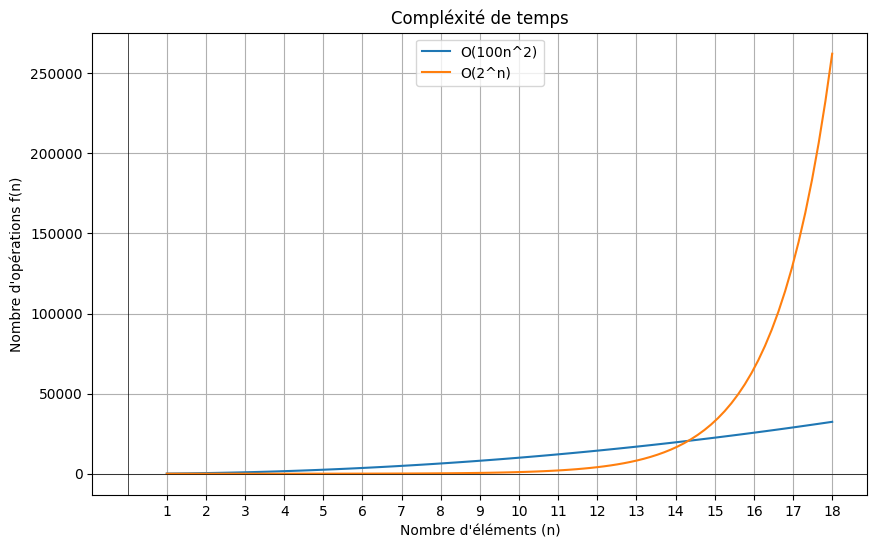

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Définir la variable symbolique
x = sp.symbols('x')

# Définir les expressions symboliques (vous pouvez modifier ou ajouter d'autres fonctions ici)
fonctions = [
    100 * x**2,              # Fonction 100n^2
    2**x                     # Fonction 2^n
]

# Noms des fonctions pour les étiquettes
noms_fonctions = [
    'O(100n^2)',                # Étiquette pour 100n^2
    'O(2^n)'                    # Étiquette pour 2^n
]

# Générer des données numériques pour le tracé
x_vals = np.linspace(1, 18, 100)
plots = []

# Tracer chaque fonction
plt.figure(figsize=(10, 6))

for i, fonction in enumerate(fonctions):
    try:
        # Créer une version numérique de l'expression symbolique
        f_lambdified = sp.lambdify(x, fonction, modules=['numpy'])

        # Évaluer la fonction pour les valeurs de x
        y_vals = f_lambdified(x_vals)

        # Tracer la fonction
        plt.plot(x_vals, y_vals, label=noms_fonctions[i])

    except Exception as e:
        print(f"Erreur lors du tracé de {noms_fonctions[i]} : {e}")

# Ajouter un titre et des étiquettes
plt.title('Compléxité de temps')
plt.xlabel("Nombre d'éléments (n)")
plt.ylabel("Nombre d'opérations f(n)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Personnaliser les espacements des marques de graduation sur l'axe des x
plt.xticks(np.arange(1, 19, 1))  # Ajustez le pas selon vos besoins

# Ajouter une légende au graphique
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()

On peut voir très bien que les deux fonctions se croisent quand $n$ est environ égal à **14** ($\approx$ 14.32) !

## **Exercice 4**
Soit $T$ un tableau de nombres entiers dont les indices sont compris entre 1 et $n$. Écrivez une fonction qui retourne la valeur VRAI si les éléments de $T$ sont tous distincts et la valeur FAUX dans le cas contraire. La complexité de votre fonction doit être plus petite que $n^2$.


L'idée est de partir de l'algorithme ***Tri-Fusion*** (Merge Sort) pour trier d'abord le tableau. TriFusion est un algorithme de tri diviser-pour-régner qui utilise une approche récursive. Il divise la liste ou le tableau à trier en sous-listes, trie chaque sous-liste, puis fusionne les sous-listes triées pour former une seule liste triée. Les 3 étapes principales de l'algorithme sont:

1.   **Diviser :**
Si le tableau contient plus d'un élément, on le divise en deux moitiés à peu près égales.
On applique ensuite récursivement l'algorithme de TriFusion sur chaque sous-tableau.

2. **Trier :**
Si une sous-liste contient un seul élément, elle est déjà triée.
Si une sous-liste contient plusieurs éléments, elle est divisée à nouveau jusqu'à ce qu'on obtienne des sous-listes d'un seul élément.

3.   **Fusionner :**
Une fois les sous-listes divisées en éléments unitaires, on les fusionne deux à deux. La fusion se fait en comparant les éléments des deux sous-listes et en les réorganisant dans un ordre trié.

L'animation ci-dessous montre l'exécution de l'algo avec un tableau de 8 chiffres:

In [8]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif')

Pseudocode pour la procédure *Fusionner*

```
Procédure fusionner(tab, debut, fin1, fin2, temp)

Entrée :
   - tab : tableau indicé de 1 à n (inclus)
   - debut, fin1, fin2 : indices entre 1 et n
Sortie :
   - temp : tableau indicé de 1 à n (inclus), fusion de tab[debut..fin1] et tab[fin1+1..fin2]

Début
   i ← debut   
   j ← fin1 + 1  

   Pour k ← debut à fin2 faire  
      Si i ≤ fin1 et (j > fin2 ou tab[i] < tab[j]) alors
         temp[k] ← tab[i]
         i ← i + 1
      Sinon
         temp[k] ← tab[j]
         j ← j + 1
      FinSi
   FinPour
FinProcédure

```



In [9]:
def fusionner(tab, debut, fin1, fin2, temp):
    """
    Fusionne deux sous-tableaux triés dans un tableau temporaire.

    Paramètres :
    tab (list) : Le tableau source contenant les éléments à fusionner.
    debut (int) : Indice de début du premier sous-tableau.
    fin1 (int) : Indice de fin du premier sous-tableau.
    fin2 (int) : Indice de fin du second sous-tableau.
    temp (list) : Le tableau temporaire qui contiendra la fusion des deux sous-tableaux.
    """

    i = debut  # Initialiser i à l'indice de début du premier sous-tableau
    j = fin1 + 1  # Initialiser j à l'indice de début du second sous-tableau (fin1 + 1)

    # Boucle pour parcourir de debut à fin2 inclus
    for k in range(debut, fin2 + 1):

        # Si i est encore dans les limites du premier sous-tableau et que
        # j est hors limites ou bien que tab[i] est plus petit que tab[j]
        if i <= fin1 and (j > fin2 or tab[i] < tab[j]):

            temp[k] = tab[i]  # Copier l'élément du premier sous-tableau dans temp
            i += 1  # Avancer l'indice du premier sous-tableau
        else:
            temp[k] = tab[j]  # Copier l'élément du second sous-tableau dans temp
            j += 1  # Avancer l'indice du second sous-tableau

Pseudocode pour l'algorithme de *TriFusion*

```
Procédure triFusion(tab, bi, bs)
    Entrée :
      tab : tableau indicé de 1 à n incl.
      bi, bs : indices entre 1 et n

    Sortie :
      tab : tableau indicé de 1 à n incl., trié

Début
    Si bi < bs alors   ▷ Si la portion à trier a plus d'un élément
        milieu ← (bi + bs) / 2   ▷ Calcul du milieu du tableau

        ▷ Appels récursifs pour trier chaque moitié
        triFusion(tab, bi, milieu)
        triFusion(tab, milieu + 1, bs)

        ▷ Fusionner les deux moitiés triées
        fusionner(tab, bi, milieu, bs, tabTemp)

        ▷ Copier le contenu de tabTemp dans tab
        Pour i ← bi à bs faire
            tab[i] ← tabTemp[i]
        Fin Pour
    Fin Si
Fin Procédure
```


In [10]:
def triFusion(tab, bi, bs):
    """
    Tri un tableau en utilisant l'algorithme de tri par fusion.

    Paramètres :
    tab (list) : Le tableau à trier.
    bi (int) : Indice de début de la portion du tableau à trier.
    bs (int) : Indice de fin de la portion du tableau à trier.

    Sortie :
    tab est trié entre les indices bi et bs.
    """

    if bi < bs:  # Si la portion à trier contient plus d'un élément
        milieu = (bi + bs) // 2  # Calculer le milieu du tableau

        # Appels récursifs pour trier chaque moitié
        triFusion(tab, bi, milieu)
        triFusion(tab, milieu + 1, bs)

        # Tableau temporaire pour la fusion
        tabTemp = tab.copy()

        # Fusionner les deux moitiés triées
        fusionner(tab, bi, milieu, bs, tabTemp)

        # Copier le contenu de tabTemp dans tab
        for i in range(bi, bs + 1):
            tab[i] = tabTemp[i]

In [11]:
# Exemple de tri d'un tableau avec triFusion
tab = [38, 27, 43, 3, 9, 82, 10]
triFusion(tab, 0, len(tab) - 1)
print(tab)  # Affiche le tableau trié

[3, 9, 10, 27, 38, 43, 82]


 Une fois trié, il est facile de vérifier si les éléments consécutifs sont identiques. On vérifie si l'élément d'avant $T[i - 1]$ est égal à l'élément courant $T[i]$.

In [12]:
def elements_distincts(T):
    # Tri du tableau avec l'algorithme de Tri-Fusion
    triFusion(T)

    # Vérifier si deux éléments consécutifs sont identiques
    for i in range(1, len(T)):
        if T[i] == T[i - 1]:
            return False

    # Si aucun doublon n'a été trouvé, tous les éléments sont distincts
    return True

Un petit test....

In [15]:
T = [3, 1, 4, 2, 5]
print(elements_distincts(T))  # Renvoie True, car tous les éléments sont distincts

T = [3, 1, 4, 2, 3]
print(elements_distincts(T))  # Renvoie False, car l'élément 3 apparaît deux fois

True
False


**Complexité en temps :**

*   Le tri-fusion a une complexité de O($n\log⁡n$).
*   La vérification des doublons prend O($n$).
*   Ainsi, la complexité globale est ($n\log⁡n$ + $n$), donc O($n\log⁡n$), ce qui est conforme à la contrainte demandée.

⭐ *Bonus* ⭐

On peut même faire encore mieux... Pour vérifier si tous les éléments d'un tableau $T$ sont distincts avec une complexité inférieure à O($n^2$), nous pouvons utiliser une approche basée sur les ensembles (**sets**). Un ensemble est, par définition, une collection d'objets *distincts*.  L'idée est de parcourir les éléments du tableau une seule fois et de vérifier si chaque élément a déjà été vu.


Voici une solution avec une complexité temporelle de O($n$), où $n$ est la taille du tableau, en utilisant un ensemble pour stocker les éléments uniques rencontrés au fur et à mesure.

In [13]:
def elements_distincts(T):
    # Utilisation d'un ensemble pour stocker les éléments uniques
    vus = set()

    # Parcourir tous les éléments du tableau
    for element in T:
        # Si l'élément est déjà dans l'ensemble, ce n'est pas distinct
        if element in vus:
            return False
        # Sinon, on l'ajoute à l'ensemble
        vus.add(element)

    # Si tous les éléments sont uniques, retourner VRAI
    return True

In [18]:
T = [2, 1, 4, 7, 5]
print(elements_distincts(T))  # Renvoie True, car tous les éléments sont distincts

T = [3, 1, 4, 4, 3]
print(elements_distincts(T))  # Renvoie False, car l'élément 3 apparaît deux fois


True
False


**Complexité en temps :**

*   Nous parcourons chaque élément du tableau une seule fois, donc la complexité de la boucle est O($n$).
*   L'insertion et la vérification d'existence dans un ensemble se font en temps constant O(1) en moyenne.
*   Cela donne une complexité globale de O($n$), ce qui est inférieur à O($n^2$).

